Load Packages

In [1]:
import numpy
#from numba import njit
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams

Class definition

In [18]:
class cell():
    def __init__(self):
        self.x = []
        self.y = []
        self.z = []

class field():
    def __init__(self):
        self.U = []
        self.V = []
        self.W  = []
        self.P  = []
        self.T  = []

class ReturnSliceValue(object):
    def __init__(self, data, x, y, z):
        self.data = data
        self.x = x
        self.y = y
        self.z = z

Function definition

In [31]:
#@njit
def load_data(file_name,headers):
    """
    Load data from an external file.
    
    Arguments:
    ----------
    file_name (str) : name of the data file to load
    headers (int)   : row where data starts (skips headers).
    
    Returns:
    --------
    mesh (cell)     : volumes coordinates of the mesh:
                        - mesh.x
                        - mesh.y
                        - mesh.z
    field (field)   : Fields value at cells center:
                        - field.U
                        - field.V
                        - field.W
                        - field.P
                        - field.T

    """

    mesh_aux = cell()
    field_aux = field()
    
    data = numpy.loadtxt(fname=file_name,skiprows=headers)
    
    mesh_aux.x = data[:,0]
    mesh_aux.y = data[:,1]
    mesh_aux.z = data[:,2]
    field_aux.U = data[:,3]
    field_aux.V = data[:,4]
    field_aux.W = data[:,5]
    field_aux.P = data[:,6]
    field_aux.T = data[:,7]
    
    loaded_mesh = mesh_aux
    loaded_field = field_aux
    
    return loaded_mesh,loaded_field

#@njit
def slice_plane(mesh,field,a,b,c,d):
    """
    select data over the plane:
        pi : a*x + b*y + c*z = d.
    
    Arguments:
    ----------
    mesh  (mesh)                  : Mesh coordinates
    field (field)                 : Field to be sliced.
    a (real)                      : x-component of the plane's normal vector.
    b (real)                      : y-component of the plane's normal vector
    c (real)                      : z-component of the plane's normal vector
    d (real)                      : position parameter
    
    Returns:
    --------
    slice_out (ReturnSliceValue)  : filtered data:
                                      - slice_out.data
                                      - slice_out.x
                                      - slice_out.y
                                      - slice_out.z
    """
    
    mesh_aux = cell()
    
    slice_aux = field[a*mesh.x[:]+b*mesh.y[:]+c*mesh.z[:] == d]
    mesh_aux.x = mesh.x[a*mesh.x[:]+b*mesh.y[:]+c*mesh.z[:] == d]
    mesh_aux.y = mesh.y[a*mesh.x[:]+b*mesh.y[:]+c*mesh.z[:] == d]
    mesh_aux.z = mesh.z[a*mesh.x[:]+b*mesh.y[:]+c*mesh.z[:] == d]

    slice_out = ReturnSliceValue(slice_aux, mesh_aux.x, mesh_aux.y, mesh_aux.z)
    return slice_out

#@njit
def plot_3d(x,y,z,number_of_level,scale_factor):
    
    rcParams['font.family'] = 'serif'
    rcParams['font.size'] = 14
    
    x_ticks = numpy.arange(min(x), max(x)+0.0000001, (max(x)-min(x))/5)
    y_ticks = numpy.arange(min(y), max(y)+0.0000001, (max(y)-min(y))/5)
    resolution = numpy.arange(min(z), max(z)+0.00000000001, (max(z)-min(z))/10)
    iso_levels = numpy.arange(min(z), max(z), (max(z)-min(z))/number_of_level)
    pyplot.figure(figsize=(max(x)*scale_factor,max(y)*scale_factor))
#    pyplot.title('Reduced Temperature at mid-large plane. \n')
    pyplot.xlabel('x [-]')
    pyplot.ylabel('z [-]')
    pyplot.xlim([min(x),max(x)])
    pyplot.ylim([min(y),max(y)])
    pyplot.xticks(x_ticks, rotation=75)
    pyplot.yticks(y_ticks)
    pyplot.grid()
    pyplot.tricontourf(x,y,z,
                       levels = resolution,
                       cmap='coolwarm')
    pyplot.colorbar()
    pyplot.tricontour(x,y,z,
                      levels = iso_levels,
                      ls='-.',
                      lw=2,
                      colors='black');
    #pyplot.savefig('Temp.png')
    return

Main program

In [40]:
def main():
    
    # Determinar la fila donde comienza la data
    #!head -n 411 high_ray.fld02 | tail -n 4
    
    #mesh,field = load_data('high_ray.fld02',409)
    #data_rms = load_data('rmshigh_ray.fld08',409)
    #data_avg = load_data('avghigh_ray.fld08',409)
    
    U = slice_plane(mesh,field.U,0,1,0,0)
    V = slice_plane(mesh,field.V,0,1,0,0)
    W = slice_plane(mesh,field.W,0,1,0,0)
    P = slice_plane(mesh,field.P,0,1,0,0)
    T = slice_plane(mesh,field.T,0,1,0,0)
    
    plot_3d(T.x,T.z,U.data,10,30)
    plot_3d(T.x,T.z,V.data,5,30)
    plot_3d(T.x,T.z,W.data,10,30)
    plot_3d(T.x,T.z,P.data,10,30)
    plot_3d(T.x,T.z,T.data,10,30)

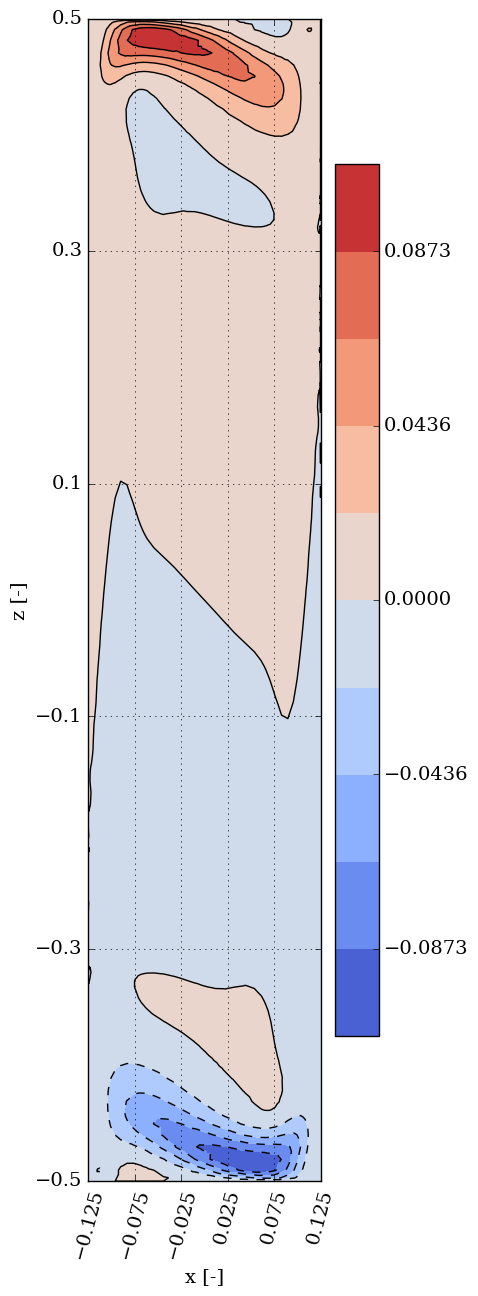

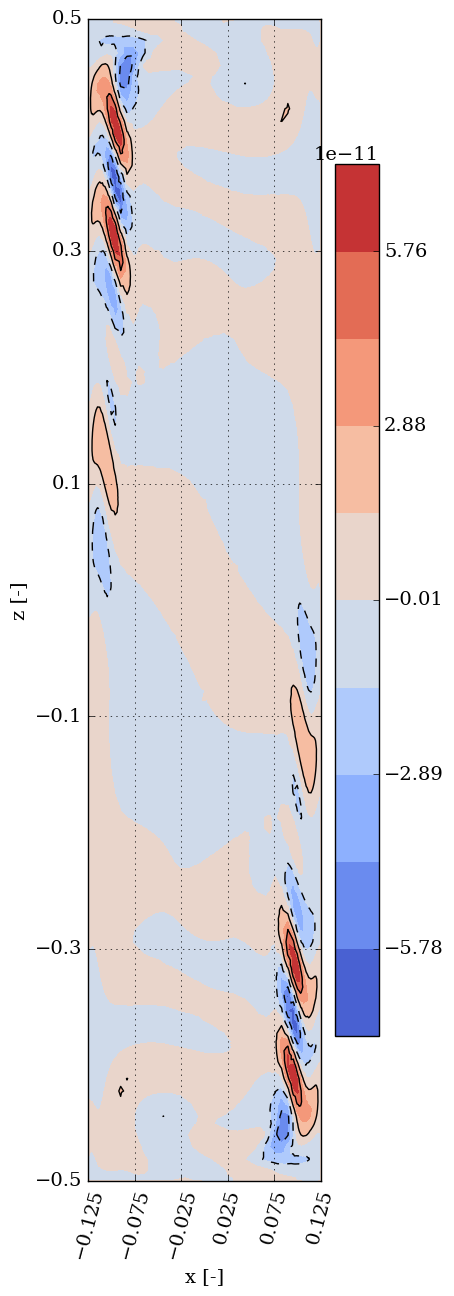

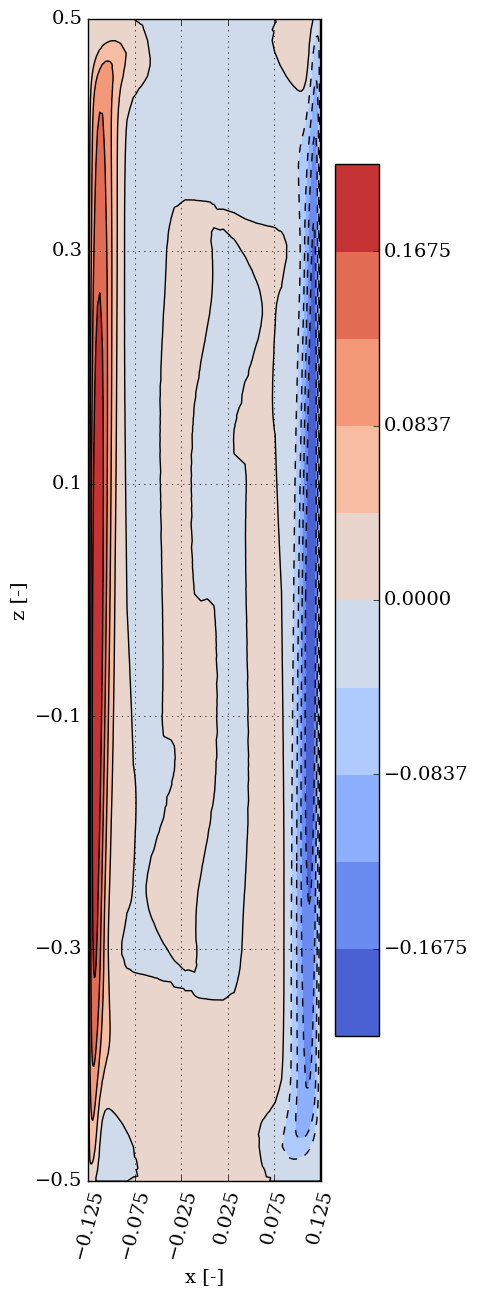

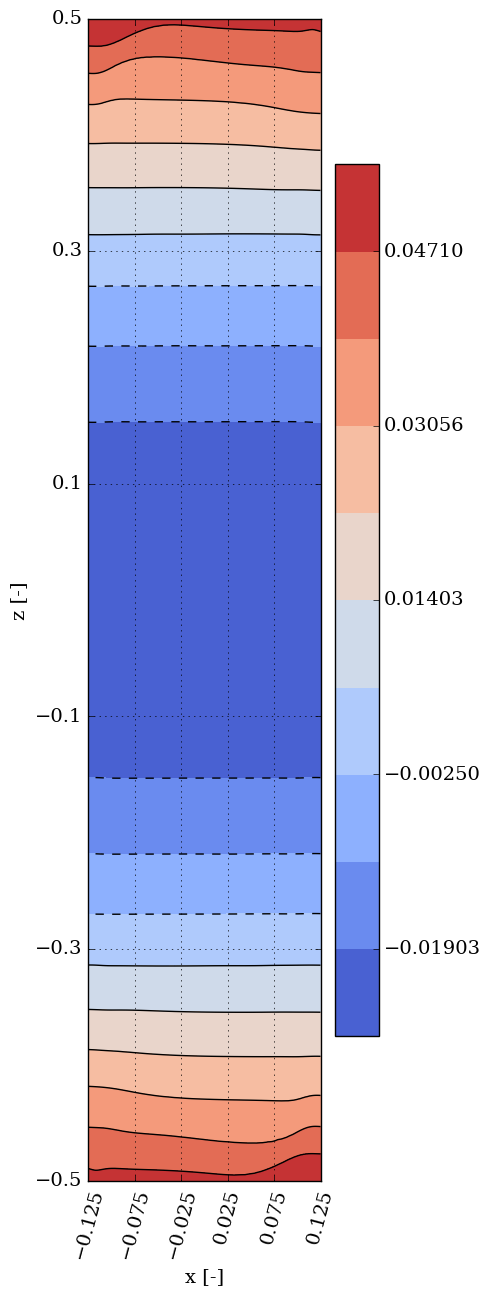

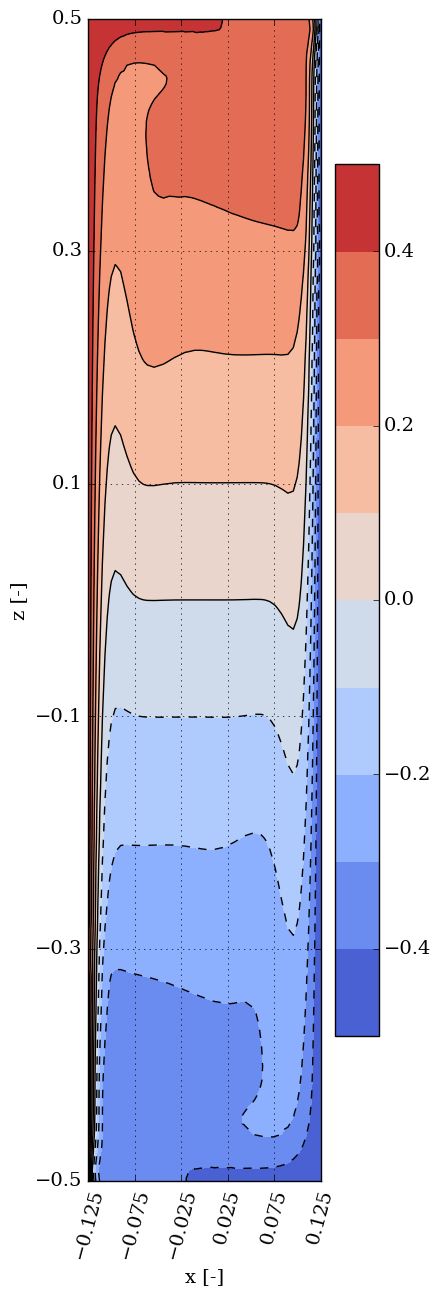

In [41]:
main()